# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [71]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [72]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')


Let's take a look at the first 5 rows of each table:

In [73]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [74]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [75]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [76]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [77]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [78]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [79]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [80]:
ratings_by_title = data.groupby('title').size()

In [81]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [82]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [83]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [84]:
mean_ratings = mean_ratings.loc[active_titles]

In [85]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [86]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [87]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for males:

In [88]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [89]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [90]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [91]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [92]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [93]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


# Solution starts here

In [94]:
#https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
def split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [95]:
data_sp=split(data, 'genres', sep='|')

In [96]:
#For the following problems, genres were separated and a file containing that information was saved for future use. 
# Another way to split the genres(slightly inefficient)

# for row in data.itertuples():
#     genre_list = row[10].split("|")
#     for genre_type in genre_list:
#         seperated = pd.DataFrame([[row[1], row[2], row[3], row[4], row[5],
#                                    row[6], row[7], row[8], row[9], genre_type]],
#                                 columns=data.columns) 
#         with open('genre_seperated.dat', 'a') as f:
#             seperated.to_csv(f, sep='\t', header=False)

# data_genre_seperated = pd.read_table('genre_seperated.dat', sep='\t', header=None, names=data.columns, engine='python')

In [97]:
### checking that the table is imported and that genres are seperated
data_sp[6000:6005]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
4238,109,2355,4,977517123,M,45,15,92028,"Bug's Life, A (1998)",Comedy
4239,112,2355,5,977508560,M,25,16,97209,"Bug's Life, A (1998)",Animation
4239,112,2355,5,977508560,M,25,16,97209,"Bug's Life, A (1998)",Children's
4239,112,2355,5,977508560,M,25,16,97209,"Bug's Life, A (1998)",Comedy
4240,114,2355,3,977506471,F,25,2,83712,"Bug's Life, A (1998)",Animation


### Problem 1

In [98]:
# rating count for each genre

# data_sp.groupby(['genres']).size()   # another solution
data_sp.pivot_table('rating', index='genres', aggfunc='count')

,rating
genres,
Action,257457
Adventure,133953
Animation,43293
Children's,72186
Comedy,356580
Crime,79541
Documentary,7910
Drama,354529
Fantasy,36301


### Problem 2

In [99]:
# top 5 movie by women on most most number of rating
data_sp.pivot_table('rating', index='genres', columns='gender', aggfunc='count')\
    .sort_values(by='F', ascending=False).head(5)['F']

genres
Drama       98153
Comedy      96271
Romance     50297
Action      45650
Thriller    40308
Name: F, dtype: int64

### Problem 3

In [100]:
# top 5 movie by men on most most number of rating
data_sp.pivot_table('rating', index='genres', columns='gender', aggfunc='count')\
    .sort_values(by='M', ascending=False).head(5)['M']

genres
Comedy      260309
Drama       256376
Action      211807
Thriller    149372
Sci-Fi      129894
Name: M, dtype: int64

### Problem 4

In [101]:
def split_year(df, column):
    '''Get year value from column and set as a separate column in a new dataframe. 
    New dataframe column remains same as the given one'''
    
    df_new = pd.DataFrame(df.copy())
    year_series = []
    for index, row in df.iterrows():
        year = int(row[column].split('(')[-1].split(')')[0])
        year_series.append(year)
    
    df_new['year'] = year_series
    return df_new

In [102]:
# separate year
data_yr = split_year(data_sp, 'title')

In [103]:
data_genre = data_yr[data_yr['genres']=='Action'].copy()
data_genre['bin'] = pd.cut(data_genre.year, [1919, 1939, 1959, 1979, 2000],\
                        labels=['1919 to 1939', '1939 to 1959', '1959 to 1979', '1979 to 2000'])
data_genre.pivot_table('rating', index='bin', aggfunc='mean').fillna(0)

,rating
bin,
1919 to 1939,3.755153
1939 to 1959,4.006926
1959 to 1979,3.852193
1979 to 2000,3.423879


### Problem 5

In [104]:
# given a genre and a rating range returns all the movies within the range sorted by rating

def movies_in_range(data, genre, rating=(4.5,5)):
    if rating[0] > rating[1]:
        return None
    
    movie_genre = data[data['genres']==genre]
    movie_genre = movie_genre.pivot_table('rating', index='title', aggfunc='mean')
    movie_genre = movie_genre[(rating[0]<=movie_genre['rating']) & (movie_genre['rating']<=rating[1])]
    return movie_genre.sort_values(by='rating', ascending=False)

In [105]:
movies_in_range(data_sp, 'Drama', [4.8,5])

,rating
title,
One Little Indian (1973),5.0
Schlafes Bruder (Brother of Sleep) (1995),5.0
Song of Freedom (1936),5.0
I Am Cuba (Soy Cuba/Ya Kuba) (1964),4.8


### Problem 6

In [106]:
# I'm curious to see if different age groups apreciate different genres.
#So I start  by examining the mean ratings for each genre by age.
mean_ratings_of_genre_by_age = data_sp.pivot_table('rating', index='genres', columns='age', aggfunc='mean')

In [107]:
mean_ratings_of_genre_by_age

age,1,18,25,35,45,50,56
genres,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


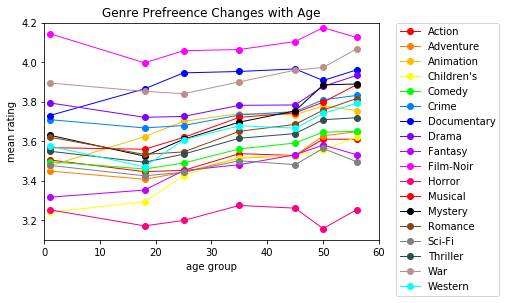

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the data below:
colors = ['#ff0000', '#ff8000', '#ffbf00', '#ffff00', '#00ff00', 
          '#0080ff', '#0000ff', '#8000ff', '#bf00ff', '#ff00ff',
          '#ff0080', '#ff0000', 'k', '#8b4513', '#808080',
          '#2f4f4f', '#bc8f8f', '#00ffff']
for x in range(0, len(mean_ratings_of_genre_by_age.values)):
    plt.plot(mean_ratings_of_genre_by_age.columns, 
             mean_ratings_of_genre_by_age.values[x], 
             'o-',
             color=colors[x],
             linewidth=1,
             label=mean_ratings_of_genre_by_age.axes[0][x])

plt.title('Genre Prefreence Changes with Age')
plt.ylabel('mean rating')
plt.xlabel('age group')
plt.axis([0, 60, 3.1, 4.2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Note that the position of the plot points are at the start of the age range 
# of the corresponding age group. So 1-17 is at 1, 18-24 is at 18, etc

Huge differenes in preference where not seen by age. The 4 most popular genres: Film-Noir, Documentary, War, and Drama remained in the top 5 in all age groups. Horor was the least popular for all age groups except the under 18 
group for which it just barely beats out Children's

Some of the more interesting patterns weren't the diffrences in preference but the difference in the criticalness between groups. Younger individuals tended to give lower ratings than older individuals. The 18-24 age group rated every genre lower than the 56+ age group. For most genres the ratings steadily increased with age. The under 18 demographic was somewhat less critical than the 18-24 group causing there to be a noticable dip before a gradual climb for several of the genres across age groups.

There was also less spread in the ratings of older individuals if one excludes the low rated Horor genre. 

Children's, which ironically was appreciated least by actual children, climbed more than most other genres such that it was only 5th least popular in the 56+ group. Animation, which shares a lot of overlap with Children's, also showed good movement with increasing age. It is 5th least popular for the under 18 group and is 5th most popular in the age 25-34 group, at which point the ratings started to level off causing it to get surpassed by several other genres to end as the 10th most popular.

Caveats: Since the ratings are set by people who voluntarily watched the movies, and people are unlikely to watch a movie they know they won't like, ratings might be more reflective of the difference between expectations and experience. If, for example, an individual doesn't like Westerns, they probably won't watch or rate them. Perhaps combining the number of times a genre is rated by age group in addition to the actual rating would be a better indication of the actual popularity of that genre by that age group. But this isn't as straightforward as it seems.  Doing so would require us to also control for the fact that some genres have more films than others meaning they could be watched more even if this genre is less liked. 

In [109]:
#Additional Tables relevant to problem 6.
#Each table is sorted by preference of a different age group

#Arranged in order of preference of under 18 group (age 1)
mean_ratings_of_genre_by_age.sort_values(by=1, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549


In [110]:
#Arranged in order of preference of 18-24 group (age 18)
mean_ratings_of_genre_by_age.sort_values(by=18, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549


In [111]:
#Arranged in order of preference of 25-34 group (age 25)
mean_ratings_of_genre_by_age.sort_values(by=25, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233


In [112]:
#Arranged in order of preference of 35-44 group (age 35)
mean_ratings_of_genre_by_age.sort_values(by=35, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233


In [113]:
#Arranged in order of preference of 45-49 group (age 45)
mean_ratings_of_genre_by_age.sort_values(by=45, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Mystery,3.631522,3.525387,3.610818,3.697396,3.754350,3.885795,3.890545


In [114]:
#Arranged in order of preference of 50-55 group (age 50)
mean_ratings_of_genre_by_age.sort_values(by=50, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Mystery,3.631522,3.525387,3.610818,3.697396,3.754350,3.885795,3.890545
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465


In [115]:
#Arranged in order of preference of 56+ group (age 56)
mean_ratings_of_genre_by_age.sort_values(by=56, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Mystery,3.631522,3.525387,3.610818,3.697396,3.754350,3.885795,3.890545
